In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [2]:
#load data
df_train = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\train.csv")
df_test = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\test.csv")

df_trans = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\transactions.csv")
df_store = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\stores.csv")
df_oil = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\oil.csv")
df_holid = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Shopwise\dataset\holidays_events.csv")

In [3]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [5]:
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
df_holid.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## Data Merging and Cleaning

In [12]:
df_trainm = df_train.merge(df_trans, how='left', on=['date','store_nbr'])
df_trainm = df_trainm.merge(df_store, how='left', on='store_nbr')
df_trainm = df_trainm.merge(df_oil, how='left', on='date')
df_trainm = df_trainm.merge(df_holid, how='left', on='date')

In [13]:
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [20]:
df_trainm['date'] = pd.to_datetime(df_trainm['date'])

In [21]:
df_trainm['year'] = df_trainm['date'].dt.year

In [23]:
df_trainm.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,store_type,cluster,dcoilwtico,holid_type,locale,locale_name,description,transferred,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013


In [14]:
df_trainm.describe()

,id,store_nbr,sales,onpromotion,transactions,cluster,dcoilwtico
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.805231e+06,3.054348e+06,2.099196e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,1.697071e+03,8.481481e+00,6.801587e+01
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,9.668317e+02,4.649735e+00,2.569134e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.619000e+01
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,1.046000e+03,4.000000e+00,4.641000e+01
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,1.395000e+03,8.500000e+00,5.343000e+01
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,2.081000e+03,1.300000e+01,9.581000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,8.359000e+03,1.700000e+01,1.106200e+02


In [15]:
df_trainm = df_trainm.rename(columns={'type_x':'store_type','type_y':'holid_type'})

In [16]:
df_trainm.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
transactions     249117
city                  0
state                 0
store_type            0
cluster               0
dcoilwtico       955152
holid_type      2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [17]:
df_trainm.nunique()

id              3000888
date               1684
store_nbr            54
family               33
sales            379610
onpromotion         362
transactions       4993
city                 22
state                16
store_type            5
cluster              17
dcoilwtico          994
holid_type            6
locale                3
locale_name          24
description         101
transferred           2
dtype: int64

In [18]:
df_trainm.transactions = df_trainm.transactions.replace(np.nan,0)
df_trainm[['locale','locale_name', 'description']] = df_trainm[['locale','locale_name', 'description']].replace(np.nan,'unknown')
df_trainm['holid_type'] = df_trainm['holid_type'].replace(np.nan,'Work Day')
df_trainm['transferred'] = df_trainm['transferred'].replace(np.nan,False)

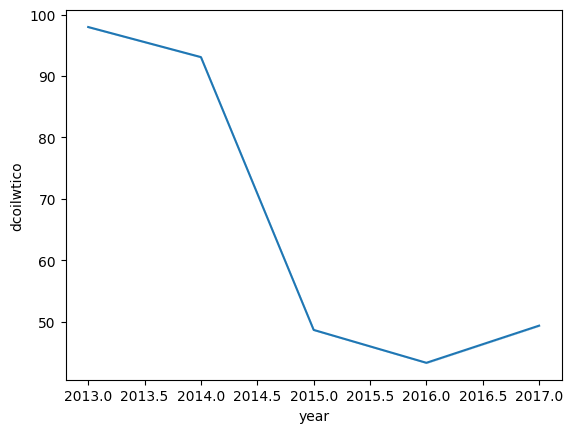

In [24]:
sns.lineplot(data=df_trainm,x='year',y='dcoilwtico')
df_trainm['dcoilwtico'] = df_trainm['dcoilwtico'].fillna(method='bfill')

In [25]:
df_trainm.to_csv('preprocessed_dataset.csv')